In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

pomorskie = pd.read_csv("../AnalysisData/10_POMORSKIE.csv")
print(pomorskie)

     Unnamed: 0  Dni od zakupu       Marka  Wiek kupującego Płeć kupującego  \
0             0              5        Beko             38.0             bd.   
1             1              4       Dyson             37.0             bd.   
2             2             10     Samsung             20.0             bd.   
3             3             14       Tefal             48.0               K   
4             4              7  Electrolux             39.0             bd.   
..          ...            ...         ...              ...             ...   
547         547             15  Electrolux             29.0             bd.   
548         548             10     Samsung             45.0             bd.   
549         549              7     Samsung             62.0               M   
550         550              2       Tefal             37.0               K   
551         551             11  Electrolux             43.0               K   

     Ocena  
0      5.0  
1      3.5  
2      2.5  

In [3]:
pomorskie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       552 non-null    int64  
 1   Dni od zakupu    552 non-null    int64  
 2   Marka            552 non-null    object 
 3   Wiek kupującego  497 non-null    float64
 4   Płeć kupującego  552 non-null    object 
 5   Ocena            552 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 26.0+ KB


In [4]:
pomorskie.describe(include='all')
df = pomorskie

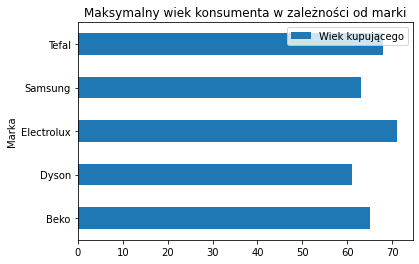

In [5]:
df_wiek = pomorskie[["Marka", "Wiek kupującego"]]

df_wiek = df_wiek.dropna().reset_index(drop=True)
d = {'Marka': 'first', 'Wiek kupującego': 'max'}

df_new = df_wiek.groupby('Marka', as_index=False).aggregate(d).reindex(columns=df_wiek.columns)

df_new.plot(kind = "barh", x = "Marka", y = "Wiek kupującego",title = "Maksymalny wiek konsumenta w zależności od marki")
plt.show()


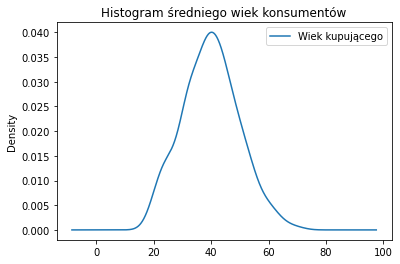

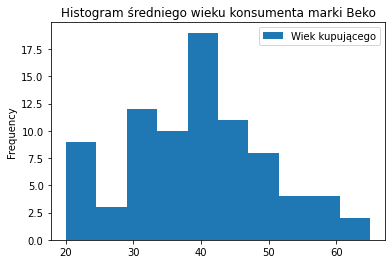

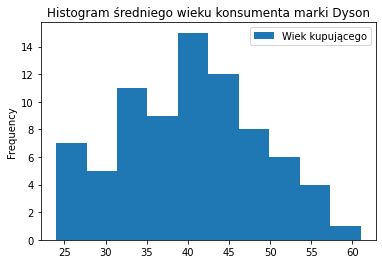

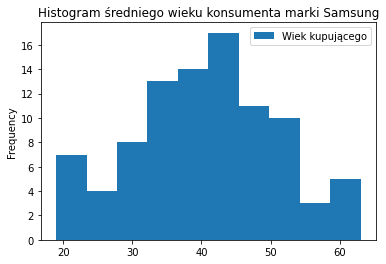

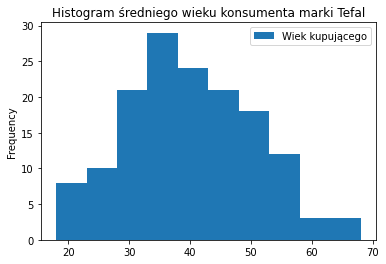

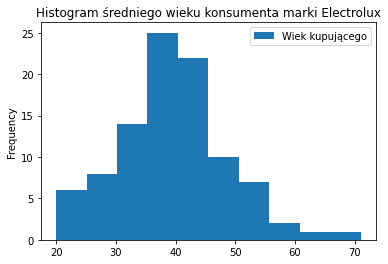

In [6]:
df.plot(kind = "kde", y = "Wiek kupującego",title = "Histogram średniego wiek konsumentów")
plt.show()
for i in df_wiek["Marka"].unique():
    df_marka_wiek = df_wiek.loc[df_wiek["Marka"]== i]
    df_marka_wiek.plot(kind = "hist", y = "Wiek kupującego",title = f"Histogram średniego wieku konsumenta marki {i}")
    


In [7]:
df_ocena = pomorskie[["Wiek kupującego", "Ocena"]]

d = {'Wiek kupującego': 'first', 'Ocena': 'mean'}
df_new_oc = df_ocena.groupby('Wiek kupującego', as_index=False).aggregate(d).reindex(columns=df_ocena.columns)


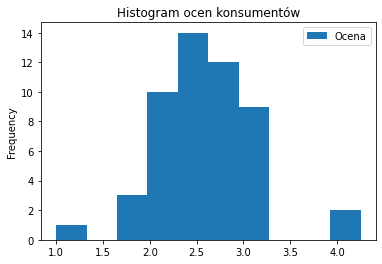

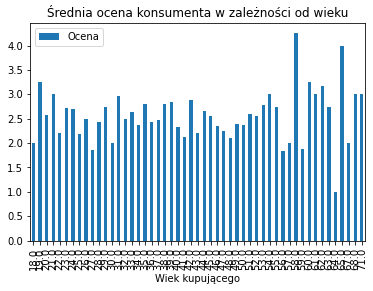

In [8]:
df_new_oc.plot(kind = "hist", y = "Ocena",title = "Histogram ocen konsumentów")
plt.show()
df_new_oc.plot(kind = "bar",x='Wiek kupującego', y = "Ocena",title = "Średnia ocena konsumenta w zależności od wieku")
plt.show()

C:\Users\Piotr Mamos\AppData\Local\Temp\ipykernel_12144\3566197335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocena["Płeć kupującego"] = df_ocena["Płeć kupującego"].replace('bd.', 'NaN')


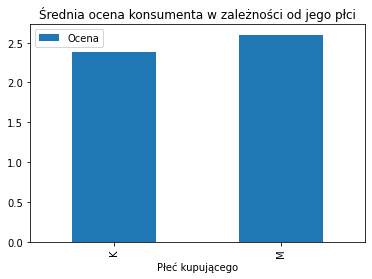

In [9]:
df_ocena = pomorskie[["Płeć kupującego", "Ocena"]]
df_ocena["Płeć kupującego"] = df_ocena["Płeć kupującego"].replace('bd.', 'NaN')
df_ocena = df_ocena[df["Płeć kupującego"] != "bd."]
d = {'Płeć kupującego': 'first', 'Ocena': 'mean'}
df_new_oc = df_ocena.groupby('Płeć kupującego', as_index=False).aggregate(d).reindex(columns=df_ocena.columns)
df_new_oc.plot(kind = "bar",
               x = "Płeć kupującego", y = "Ocena",title = "Średnia ocena konsumenta w zależności od jego płci")
plt.show()

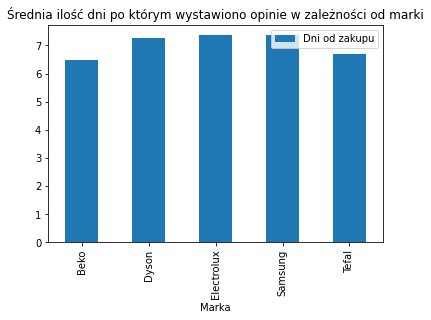

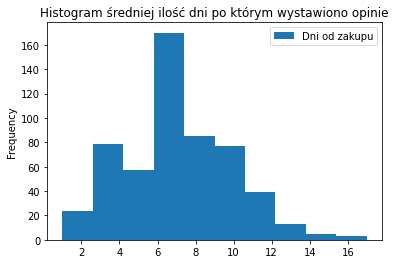

In [10]:
df_dni = pomorskie[["Dni od zakupu", "Marka"]]
d = {'Dni od zakupu': 'mean'}
df_dni_oc = df_dni.groupby('Marka', as_index=False).aggregate(d).reindex(columns=df_dni.columns)
df_dni_oc.plot(kind = "bar",
               x = "Marka", y = "Dni od zakupu",title = "Średnia ilość dni po którym wystawiono opinie w zależności od marki")
plt.show()

df.plot(kind = "hist", y = "Dni od zakupu",title = "Histogram średniej ilość dni po którym wystawiono opinie")
plt.show()